In [2]:
%run ./Vlad_Dissertation.ipynb

/home/renato/.virtualenvs/pps/lib/python3.11/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)
/tmp/ipykernel_14169/1247435164.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


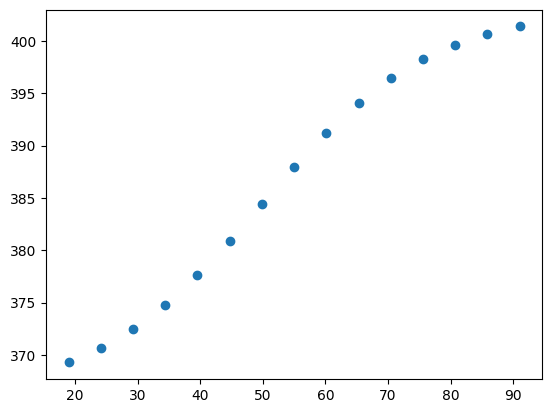

In [4]:
# Distance points in cm (network coordinates)
s_distances = np.asarray([2700, 2200, 1500, 800, 300]) / 1000
s_distances_sec = np.linspace(s_distances[0], s_distances[-1], 15)
v = 30  # cm/s
mydistances = 100 - s_distances_sec * v  # distance points in cm (network coordinates)

ts = 0.4
simtime = 200

##Pre-Training
###Healthy Controls
ymin = 366
ymax = 403
scz_cp = 100 - 1.666 * 30
scz_slope = 1 / 0.075

SCZ_RTs = RTsig(mydistances, scz_cp, scz_slope)
plt.scatter(mydistances, SCZ_RTs)

In [10]:
from scipy.optimize import differential_evolution

HCWat, HCWvt, HCWav = crossmodal(1.3, 2, 1.3, 2, 1.3, 2)
HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    6.5, 6.5, 6.5, 6.55, 6.55, 6.55, 1.185e01, 7.769e02, 3.881e01, 9.517e-01
)


def sczmodelrun(theta):
    SCZLt, SCZLa, SCZLv = Lw(
        theta[0], 0.05, 1, 4, theta[0], 0.05, 20, 80, theta[0], 0.05, 2, 8
    )
    _, _, _, _, SCZrt = experiment(
        ts,
        simtime,
        mydistances,
        5,
        SCZLt,
        SCZLa,
        SCZLv,
        HCWt,
        HCWa,
        HCWv,
        HCBt,
        HCBa,
        HCBv,
        HCWat,
        HCWvt,
        HCWav,
        0,
        0,
    )

    xf = SCZrt
    yf = SCZ_RTs

    m = (xf.size * np.sum(xf * yf) - np.sum(xf) * np.sum(yf)) / (
        xf.size * np.sum(xf * xf) - np.sum(xf) ** 2
    )
    bias = (np.sum(yf) - m * np.sum(xf)) / xf.size

    if bias < 0:
        bias = 0
    if m < 0:
        m = 0

    cost = np.sum(np.square(np.divide(yf - (m * xf + bias), yf)))

    return cost * 100000


bounds = [(0, 9)]
sczres = differential_evolution(
    sczmodelrun, bounds, disp=True, workers=-1, updating="deferred", polish=False
)

/tmp/ipykernel_14169/1941110757.py:43: RuntimeWarning: overflow encountered in exp
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_14169/1941110757.py:44: RuntimeWarning: overflow encountered in exp
  1 + np.exp((qm - qc_m) * r_m)
/tmp/ipykernel_14169/1941110757.py:43: RuntimeWarning: invalid value encountered in scalar divide
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_14169/1941110757.py:43: RuntimeWarning: overflow encountered in exp
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_14169/1941110757.py:44: RuntimeWarning: overflow encountered in exp
  1 + np.exp((qm - qc_m) * r_m)
/tmp/ipykernel_14169/1941110757.py:43: RuntimeWarning: invalid value encountered in scalar divide
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_14169/1941110757.py:43: RuntimeWarning: overflow encountered in exp
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_14169/194111075

differential_evolution step 1: f(x)= 16.354518556570255


/tmp/ipykernel_14169/1941110757.py:43: RuntimeWarning: overflow encountered in exp
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_14169/1941110757.py:44: RuntimeWarning: overflow encountered in exp
  1 + np.exp((qm - qc_m) * r_m)
/tmp/ipykernel_14169/1941110757.py:43: RuntimeWarning: invalid value encountered in scalar divide
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_14169/1941110757.py:43: RuntimeWarning: overflow encountered in exp
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_14169/1941110757.py:44: RuntimeWarning: overflow encountered in exp
  1 + np.exp((qm - qc_m) * r_m)
/tmp/ipykernel_14169/1941110757.py:43: RuntimeWarning: invalid value encountered in scalar divide
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_14169/1941110757.py:43: RuntimeWarning: overflow encountered in exp
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_14169/194111075

differential_evolution step 2: f(x)= 13.185685277007131


/tmp/ipykernel_14169/1941110757.py:43: RuntimeWarning: overflow encountered in exp
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_14169/1941110757.py:44: RuntimeWarning: overflow encountered in exp
  1 + np.exp((qm - qc_m) * r_m)
/tmp/ipykernel_14169/1941110757.py:43: RuntimeWarning: invalid value encountered in scalar divide
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_14169/1941110757.py:43: RuntimeWarning: overflow encountered in exp
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_14169/1941110757.py:44: RuntimeWarning: overflow encountered in exp
  1 + np.exp((qm - qc_m) * r_m)
/tmp/ipykernel_14169/1941110757.py:43: RuntimeWarning: invalid value encountered in scalar divide
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_14169/1941110757.py:43: RuntimeWarning: overflow encountered in exp
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_14169/194111075

differential_evolution step 3: f(x)= 13.185685277007131
differential_evolution step 4: f(x)= 13.185685277007131
differential_evolution step 5: f(x)= 12.054337790457094
differential_evolution step 6: f(x)= 10.714555670576038
differential_evolution step 7: f(x)= 10.714555670576038
differential_evolution step 8: f(x)= 10.714555670576038
differential_evolution step 9: f(x)= 10.714555670576038
differential_evolution step 10: f(x)= 10.714555670576038
differential_evolution step 11: f(x)= 10.714555670576038
differential_evolution step 12: f(x)= 10.714555670576038
differential_evolution step 13: f(x)= 10.714555670576038
differential_evolution step 14: f(x)= 10.714555670576038
differential_evolution step 15: f(x)= 10.714555670576038


In [11]:
print(sczres)

             message: Optimization terminated successfully.
             success: True
                 fun: 10.714555670576038
                   x: [ 8.998e+00]
                 nit: 15
                nfev: 240
          population: [[ 8.998e+00]
                       [ 8.994e+00]
                       ...
                       [ 8.992e+00]
                       [ 8.994e+00]]
 population_energies: [ 1.071e+01  1.071e+01 ...  1.071e+01  1.071e+01]


In [71]:
## Fitted model

Lex = 8.998e00
SCZLt, SCZLa, SCZLv = Lw(Lex, 0.05, 1, 4, Lex, 0.05, 20, 80, Lex, 0.05, 2, 8)
HCWat, HCWvt, HCWav = crossmodal(1.3, 2, 1.3, 2, 1.3, 2)
HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    6.5, 6.5, 6.5, 6.55, 6.55, 6.55, 1.185e01, 7.769e02, 3.881e01, 9.517e-01
)
_, _, _, _, SCZ_Model_RTs = experiment(
    ts,
    simtime,
    mydistances,
    5,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    0,
)

/tmp/ipykernel_14169/1941110757.py:43: RuntimeWarning: overflow encountered in exp
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (
/tmp/ipykernel_14169/1941110757.py:44: RuntimeWarning: overflow encountered in exp
  1 + np.exp((qm - qc_m) * r_m)
/tmp/ipykernel_14169/1941110757.py:43: RuntimeWarning: invalid value encountered in scalar divide
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (


5.0435968521613574 184.2177355556918


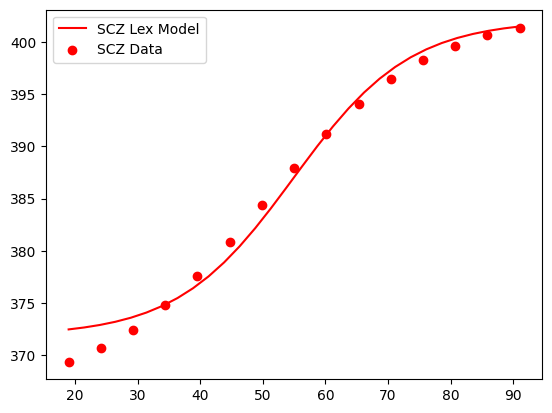

In [74]:
xf = SCZ_Model_RTs
yf = SCZ_RTs
m = (xf.size * np.sum(xf * yf) - np.sum(xf) * np.sum(yf)) / (
    xf.size * np.sum(xf * xf) - np.sum(xf) ** 2
)
bias = (np.sum(yf) - m * np.sum(xf)) / xf.size

ymin, ymax = np.min(m * xf + bias), np.max(m * xf + bias)
dc, h = fitting(mydistances, m * xf + bias)
mydistances_exp = np.linspace(mydistances[0], mydistances[-1], 30)
yf_exp = RTsig(mydistances_exp, dc, h)

plt.figure(1)
plt.plot(mydistances_exp, yf_exp, label="SCZ Lex Model", color="r")
plt.scatter(mydistances, yf, label="SCZ Data", color="r")
plt.legend()
print(m, bias)

In [72]:
from sklearn import metrics

print(metrics.root_mean_squared_error(yf, m * xf + bias))

1.0035741493201686


In [73]:
def adjrmse(model, data, k):
    sse = np.sum(np.square(data - model))
    n = len(model)
    return np.sqrt(sse / (n - k))


scz_error = adjrmse(m * xf + bias, yf, 3)
print(scz_error)

1.1220300091707107
